# Feature Engineering

In [ ]:
# Allstate Purchase Prediction Challenge

# 고객이 자동차 보험상품을 구매하기까지의 transaction 기록
# 각 customer ID 별로 quote history 포함
# 각 customer ID 별 마지막 행이 구매 포인트 (record_type=1)

In [49]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
data = pd.read_csv('Allstate_train.csv')
data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


### Handling Missing Values

In [51]:
data.shape

(665249, 25)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        665249 non-null  int64  
 1   shopping_pt        665249 non-null  int64  
 2   record_type        665249 non-null  int64  
 3   day                665249 non-null  int64  
 4   time               665249 non-null  object 
 5   state              665249 non-null  object 
 6   location           665249 non-null  int64  
 7   group_size         665249 non-null  int64  
 8   homeowner          665249 non-null  int64  
 9   car_age            665249 non-null  int64  
 10  car_value          663718 non-null  object 
 11  risk_factor        424831 non-null  float64
 12  age_oldest         665249 non-null  int64  
 13  age_youngest       665249 non-null  int64  
 14  married_couple     665249 non-null  int64  
 15  C_previous         646538 non-null  float64
 16  du

In [53]:
data[data.customer_ID == 10000000]

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
5,10000000,6,0,0,11:57,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
6,10000000,7,0,0,11:58,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
7,10000000,8,0,0,12:03,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,638
8,10000000,9,1,0,12:07,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,634


In [54]:
dataP = data.loc[data.record_type == 1].copy()
dataP.head(3)

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
8,10000000,9,1,0,12:07,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,634
14,10000005,6,1,3,09:09,NY,10006,1,0,10,...,3.0,13.0,0,0,3,2,0,0,2,731
22,10000007,8,1,4,14:26,PA,10008,1,0,11,...,2.0,4.0,0,0,1,2,0,0,1,602


In [55]:
dataP.shape

(97009, 25)

In [56]:
con = ['group_size','car_age','age_oldest','age_youngest','duration_previous','cost']
cat = ['day','homeowner','car_value','risk_factor','married_couple','C_previous','state', 'location','shopping_pt']

In [57]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_ID        97009 non-null  int64  
 1   shopping_pt        97009 non-null  int64  
 2   record_type        97009 non-null  int64  
 3   day                97009 non-null  int64  
 4   time               97009 non-null  object 
 5   state              97009 non-null  object 
 6   location           97009 non-null  int64  
 7   group_size         97009 non-null  int64  
 8   homeowner          97009 non-null  int64  
 9   car_age            97009 non-null  int64  
 10  car_value          97009 non-null  object 
 11  risk_factor        62663 non-null  float64
 12  age_oldest         97009 non-null  int64  
 13  age_youngest       97009 non-null  int64  
 14  married_couple     97009 non-null  int64  
 15  C_previous         96173 non-null  float64
 16  duration_previous  96

In [58]:
dataP.isnull().sum()

customer_ID              0
shopping_pt              0
record_type              0
day                      0
time                     0
state                    0
location                 0
group_size               0
homeowner                0
car_age                  0
car_value                0
risk_factor          34346
age_oldest               0
age_youngest             0
married_couple           0
C_previous             836
duration_previous      836
A                        0
B                        0
C                        0
D                        0
E                        0
F                        0
G                        0
cost                     0
dtype: int64

### 1. Drop

In [59]:
dataP_drop = dataP.dropna(subset=['risk_factor','C_previous','duration_previous'])
dataP_drop.shape

(62255, 25)

In [60]:
dataP_drop.isnull().sum().sum()

0

### 2. SimpleImputer
##### Continuous feature의 결측값 대체

In [61]:
dataP[con].head(3)

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost
8,2,2,46,42,2.0,634
14,1,10,28,28,13.0,731
22,1,11,43,43,4.0,602


In [62]:
dataP[con].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   group_size         97009 non-null  int64  
 1   car_age            97009 non-null  int64  
 2   age_oldest         97009 non-null  int64  
 3   age_youngest       97009 non-null  int64  
 4   duration_previous  96173 non-null  float64
 5   cost               97009 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 5.2 MB


In [63]:
#from sklearn.preprocessing import Imputer
#imputer_con = Imputer(strategy="median")  
#imputer_con.fit(dataP[con])

from sklearn.impute import SimpleImputer

In [64]:
imputer_con = SimpleImputer(missing_values=np.nan, strategy='median')

<div>
- strategy="mean": 평균 대체 <br/>
- strategy="median": 중위수 대체 <br/>
- strategy="most_frequent":최빈값 대체 <br/>
</div>

In [65]:
imputer_con.fit(dataP[con])

SimpleImputer(strategy='median')

In [66]:
imputer_con.transform(dataP[con])

array([[  2.,   2.,  46.,  42.,   2., 634.],
       [  1.,  10.,  28.,  28.,  13., 731.],
       [  1.,  11.,  43.,  43.,   4., 602.],
       ...,
       [  1.,   8.,  23.,  23.,   5., 716.],
       [  1.,   0.,  39.,  39.,   7., 651.],
       [  1.,   1.,  20.,  20.,   4., 681.]])

In [67]:
x = imputer_con.transform(dataP[con])
x

array([[  2.,   2.,  46.,  42.,   2., 634.],
       [  1.,  10.,  28.,  28.,  13., 731.],
       [  1.,  11.,  43.,  43.,   4., 602.],
       ...,
       [  1.,   8.,  23.,  23.,   5., 716.],
       [  1.,   0.,  39.,  39.,   7., 651.],
       [  1.,   1.,  20.,  20.,   4., 681.]])

In [68]:
dataP_imp = dataP
dataP_imp[con] = pd.DataFrame(x, columns=dataP[con].columns, index=dataP[con].index)
dataP_imp[con].head()

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost
8,2.0,2.0,46.0,42.0,2.0,634.0
14,1.0,10.0,28.0,28.0,13.0,731.0
22,1.0,11.0,43.0,43.0,4.0,602.0
26,2.0,3.0,62.0,60.0,3.0,626.0
32,1.0,5.0,32.0,28.0,2.0,614.0


In [69]:
dataP_imp[con].shape

(97009, 6)

##### Categorical feature 의 결측값 대체

In [70]:
cat

['day',
 'homeowner',
 'car_value',
 'risk_factor',
 'married_couple',
 'C_previous',
 'state',
 'location',
 'shopping_pt']

In [71]:
dataP_imp[cat].dtypes

day                 int64
homeowner           int64
car_value          object
risk_factor       float64
married_couple      int64
C_previous        float64
state              object
location            int64
shopping_pt         int64
dtype: object

In [72]:
obj=['car_value','state'] 

In [73]:
dataP['car_value'].head()

8     g
14    e
22    c
26    d
32    d
Name: car_value, dtype: object

In [74]:
print(dataP['car_value'].astype('category').cat.categories)

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], dtype='object')


In [75]:
print(dataP['state'].astype('category').cat.categories)

Index(['AL', 'AR', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IN', 'KS',
       'KY', 'MD', 'ME', 'MO', 'MS', 'MT', 'ND', 'NE', 'NH', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SD', 'TN', 'UT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')


In [76]:
dataP_imp[obj]

,car_value,state
8,g,IN
14,e,NY
22,c,PA
26,d,WV
32,d,MO
...,...,...
665225,e,FL
665233,g,FL
665239,e,CT
665242,g,FL


In [77]:
def f(x):
    return x+1
pd.Series([1,2,3]).apply(f)

0    2
1    3
2    4
dtype: int64

In [78]:
#pd.Series([1,2,3]).apply(f)
# lambda : 익명의 함수

pd.Series([1,2,3]).apply(lambda x: x+1)

0    2
1    3
2    4
dtype: int64

In [79]:
# cat.code : 문자가 범주형으로 바뀌면 생기는 코드

dataP_imp[obj] = dataP_imp[obj].apply(lambda x: x.astype('category').cat.codes) 
dataP_imp[obj].head()

,car_value,state
8,6,10
14,4,23
22,2,27
26,3,34
32,3,15


In [80]:
dataP_imp.dtypes

customer_ID            int64
shopping_pt            int64
record_type            int64
day                    int64
time                  object
state                   int8
location               int64
group_size           float64
homeowner              int64
car_age              float64
car_value               int8
risk_factor          float64
age_oldest           float64
age_youngest         float64
married_couple         int64
C_previous           float64
duration_previous    float64
A                      int64
B                      int64
C                      int64
D                      int64
E                      int64
F                      int64
G                      int64
cost                 float64
dtype: object

In [81]:
dataP_imp[cat].isnull().sum()

day                   0
homeowner             0
car_value             0
risk_factor       34346
married_couple        0
C_previous          836
state                 0
location              0
shopping_pt           0
dtype: int64

In [82]:
imputer_cat = SimpleImputer(strategy="most_frequent")
dataP_imp[cat] = imputer_cat.fit_transform(dataP_imp[cat])

In [83]:
dataP_imp[cat].head()

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,location,shopping_pt
8,0.0,0.0,6.0,3.0,1.0,1.0,10.0,10001.0,9.0
14,3.0,0.0,4.0,4.0,0.0,3.0,23.0,10006.0,6.0
22,4.0,0.0,2.0,3.0,0.0,2.0,27.0,10008.0,8.0
26,4.0,1.0,3.0,3.0,1.0,3.0,34.0,10014.0,4.0
32,1.0,0.0,3.0,3.0,1.0,1.0,15.0,10015.0,6.0


In [84]:
dataP_imp[cat].isnull().sum()

day               0
homeowner         0
car_value         0
risk_factor       0
married_couple    0
C_previous        0
state             0
location          0
shopping_pt       0
dtype: int64

In [85]:
dataP_imp[cat].dtypes

day               float64
homeowner         float64
car_value         float64
risk_factor       float64
married_couple    float64
C_previous        float64
state             float64
location          float64
shopping_pt       float64
dtype: object

### Handling Categorical Variables

In [86]:
dataP_imp[cat] = dataP_imp[cat].astype(int)
dataP_imp[cat].dtypes

day               int32
homeowner         int32
car_value         int32
risk_factor       int32
married_couple    int32
C_previous        int32
state             int32
location          int32
shopping_pt       int32
dtype: object

##### 1. One-Hot Encoding

In [87]:
dataP_imp['day'].head()

8     0
14    3
22    4
26    4
32    1
Name: day, dtype: int32

In [88]:
# get_dummies : 판다스에서 제공하는 메소드, 넘파이로 바뀌면 필드가 안보여서 이것을 많이 쓴다.
# 쪼개기 전에 실행한다. 아니면 학습시 달라질 수 있어 또는 합친후 다시 실행한다.

dataP_imp = pd.get_dummies(dataP_imp,columns=['day'])
dataP_imp.head()

,customer_ID,shopping_pt,record_type,time,state,location,group_size,homeowner,car_age,car_value,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
8,10000000,9,1,12:07,10,10001,2.0,0,2.0,6,...,2,1,634.0,1,0,0,0,0,0,0
14,10000005,6,1,09:09,23,10006,1.0,0,10.0,4,...,0,2,731.0,0,0,0,1,0,0,0
22,10000007,8,1,14:26,27,10008,1.0,0,11.0,2,...,0,1,602.0,0,0,0,0,1,0,0
26,10000013,4,1,09:31,34,10014,2.0,1,3.0,3,...,1,3,626.0,0,0,0,0,1,0,0
32,10000014,6,1,17:50,15,10015,1.0,0,5.0,3,...,2,2,614.0,0,1,0,0,0,0,0


In [89]:
dataP_imp.filter(like='day').head()

,day_0,day_1,day_2,day_3,day_4,day_5,day_6
8,1,0,0,0,0,0,0
14,0,0,0,1,0,0,0
22,0,0,0,0,1,0,0
26,0,0,0,0,1,0,0
32,0,1,0,0,0,0,0


In [90]:
dataP_imp.shape

(97009, 31)

##### 2. Label Encoding

In [91]:
dataP['car_value'].value_counts()

4    32161
5    25943
3    16402
6    14387
7     4158
2     3072
8      502
1      210
0      174
Name: car_value, dtype: int64

In [92]:
dataP['car_value'] = dataP['car_value'].astype('category')

In [93]:
dataP['car_value'] = dataP['car_value'].cat.codes

In [94]:
dataP['car_value'].value_counts()

4    32161
5    25943
3    16402
6    14387
7     4158
2     3072
8      502
1      210
0      174
Name: car_value, dtype: int64

### Feature Scaling
##### 1. Min-max scaling ( 0 ~ 1 사이 )

In [95]:
dataP_imp = dataP_imp.drop(['customer_ID', 'record_type', 'time','location'], axis=1)
dataP_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shopping_pt        97009 non-null  int32  
 1   state              97009 non-null  int32  
 2   group_size         97009 non-null  float64
 3   homeowner          97009 non-null  int32  
 4   car_age            97009 non-null  float64
 5   car_value          97009 non-null  int32  
 6   risk_factor        97009 non-null  int32  
 7   age_oldest         97009 non-null  float64
 8   age_youngest       97009 non-null  float64
 9   married_couple     97009 non-null  int32  
 10  C_previous         97009 non-null  int32  
 11  duration_previous  97009 non-null  float64
 12  A                  97009 non-null  int64  
 13  B                  97009 non-null  int64  
 14  C                  97009 non-null  int64  
 15  D                  97009 non-null  int64  
 16  E                  97

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataP_imp)

MinMaxScaler()

In [97]:
x = scaler.transform(dataP_imp)
x

array([[0.6       , 0.28571429, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.3       , 0.65714286, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.77142857, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.3       , 0.08571429, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.17142857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3       , 0.34285714, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
dataP_imp_s = pd.DataFrame(x, columns=dataP_imp.columns)
dataP_imp_s.head()

,shopping_pt,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0.6,0.285714,0.333333,0.0,0.023529,0.750,0.666667,0.491228,0.440678,1.0,...,0.666667,0.000000,0.644097,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3,0.657143,0.000000,0.0,0.117647,0.500,1.000000,0.175439,0.203390,0.0,...,0.000000,0.333333,0.812500,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.5,0.771429,0.000000,0.0,0.129412,0.250,0.666667,0.438596,0.457627,0.0,...,0.000000,0.000000,0.588542,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.1,0.971429,0.333333,1.0,0.035294,0.375,0.666667,0.771930,0.745763,1.0,...,0.333333,0.666667,0.630208,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.3,0.428571,0.000000,0.0,0.058824,0.375,0.666667,0.245614,0.203390,1.0,...,0.666667,0.333333,0.609375,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [100]:
dataP_imp_s.describe().T

,count,mean,std,min,25%,50%,75%,max
shopping_pt,97009.0,0.385760,0.199836,0.0,0.200000,0.400000,0.500000,1.0
state,97009.0,0.483866,0.288620,0.0,0.171429,0.571429,0.714286,1.0
group_size,97009.0,0.078539,0.153932,0.0,0.000000,0.000000,0.000000,1.0
homeowner,97009.0,0.545485,0.497929,0.0,0.000000,1.000000,1.000000,1.0
car_age,97009.0,0.096248,0.068194,0.0,0.035294,0.094118,0.141176,1.0
car_value,97009.0,0.558406,0.150770,0.0,0.500000,0.500000,0.625000,1.0
risk_factor,97009.0,0.572363,0.307027,0.0,0.333333,0.666667,0.666667,1.0
age_oldest,97009.0,0.476871,0.305082,0.0,0.192982,0.456140,0.736842,1.0
age_youngest,97009.0,0.452247,0.296423,0.0,0.169492,0.406780,0.694915,1.0
married_couple,97009.0,0.211692,0.408510,0.0,0.000000,0.000000,0.000000,1.0


##### 2. Standardization

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataP_imp)

StandardScaler()

In [102]:
x = scaler.transform(dataP_imp)
x

array([[ 1.07208558, -0.68655238,  1.65524735, ..., -0.52324571,
        -0.12244715, -0.03504564],
       [-0.42915509,  0.60036737, -0.51022209, ..., -0.52324571,
        -0.12244715, -0.03504564],
       [ 0.57167202,  0.99634268, -0.51022209, ...,  1.911148  ,
        -0.12244715, -0.03504564],
       ...,
       [-0.42915509, -1.37950917, -0.51022209, ...,  1.911148  ,
        -0.12244715, -0.03504564],
       [-1.93039575, -1.08252769, -0.51022209, ..., -0.52324571,
        -0.12244715, -0.03504564],
       [-0.42915509, -0.48856473, -0.51022209, ..., -0.52324571,
        -0.12244715, -0.03504564]])

In [104]:
dataP_imp_s = pd.DataFrame(x, columns=dataP_imp.columns)
dataP_imp_s.head()

,shopping_pt,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,F,G,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1.072086,-0.686552,1.655247,-1.095513,-1.066349,1.270775,0.307154,0.047061,-0.039027,1.929728,...,0.878538,-1.438971,-0.010880,2.054339,-0.497457,-0.490692,-0.476558,-0.523246,-0.122447,-0.035046
1,-0.429155,0.600367,-0.510222,-1.095513,0.313800,-0.387383,1.392841,-0.988043,-0.839537,-0.518208,...,-1.230445,-0.313247,2.241491,-0.486775,-0.497457,-0.490692,2.098380,-0.523246,-0.122447,-0.035046
2,0.571672,0.996343,-0.510222,-1.095513,0.486319,-2.045542,0.307154,-0.125456,0.018152,-0.518208,...,-1.230445,-1.438971,-0.753929,-0.486775,-0.497457,-0.490692,-0.476558,1.911148,-0.122447,-0.035046
3,-1.429982,1.689299,1.655247,0.912814,-0.893831,-1.216463,0.307154,0.967154,0.990199,1.929728,...,-0.175953,0.812477,-0.196642,-0.486775,-0.497457,-0.490692,-0.476558,1.911148,-0.122447,-0.035046
4,-0.429155,-0.191583,-0.510222,-1.095513,-0.548793,-1.216463,0.307154,-0.758019,-0.839537,1.929728,...,0.878538,-0.313247,-0.475286,-0.486775,2.010224,-0.490692,-0.476558,-0.523246,-0.122447,-0.035046


In [106]:
dataP_imp_s.describe().T

,count,mean,std,min,25%,50%,75%,max
shopping_pt,97009.0,-1.134155e-15,1.000005,-1.930396,-0.929569,0.071258,0.571672,3.073740
state,97009.0,1.294966e-16,1.000005,-1.676491,-1.082528,0.303386,0.798355,1.788293
group_size,97009.0,3.469409e-15,1.000005,-0.510222,-0.510222,-0.510222,-0.510222,5.986186
homeowner,97009.0,-1.152506e-15,1.000005,-1.095513,-1.095513,0.912814,0.912814,0.912814
car_age,97009.0,1.387513e-16,1.000005,-1.411386,-0.893831,-0.031237,0.658837,13.252700
car_value,97009.0,-1.462664e-15,1.000005,-3.703701,-0.387383,-0.387383,0.441696,2.928934
risk_factor,97009.0,-8.593073e-16,1.000005,-1.864221,-0.778534,0.307154,0.307154,1.392841
age_oldest,97009.0,4.946145e-16,1.000005,-1.563100,-0.930537,-0.067950,0.852142,1.714729
age_youngest,97009.0,-2.303648e-16,1.000005,-1.525688,-0.953895,-0.153386,0.818661,1.847888
married_couple,97009.0,-1.236307e-15,1.000005,-0.518208,-0.518208,-0.518208,-0.518208,1.929728


#### The effect of preprocessing on supervised learning

In [107]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
cancer.data 

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [108]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)  

In [111]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train).score(X_test, y_test)

0.9440559440559441

In [113]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
# Scaling training and test data the same way
#X_test_scaled = scaler.fit(X_test).transform(X_test)
X_test_scaled = scaler.transform(X_test) 
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.965034965034965

In [114]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.958041958041958

### Feature Selection
##### 1. Model based feature selection

In [115]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(), threshold=None) # threshold=None 스스로 알아서 처리
# select 는 전처리기

In [116]:
X_train_fs = select.fit(X_train, y_train).transform(X_train)
# 변수의 중요도가 나온다.
print("X_train.shape: {}, X_train_fs.shape: {}".format(
    X_train.shape, X_train_fs.shape))

X_train.shape: (426, 30), X_train_fs.shape: (426, 9)


In [117]:
X_train_fs

array([[7.554e+01, 4.327e+02, 2.688e-02, ..., 8.435e+01, 5.178e+02,
        9.140e-02],
       [7.194e+01, 3.873e+02, 5.006e-03, ..., 7.691e+01, 4.361e+02,
        2.022e-02],
       [1.312e+02, 1.261e+03, 1.440e-01, ..., 1.550e+02, 1.731e+03,
        1.628e-01],
       ...,
       [5.982e+01, 2.786e+02, 2.710e-02, ..., 7.579e+01, 4.396e+02,
        5.052e-02],
       [6.073e+01, 2.881e+02, 0.000e+00, ..., 6.225e+01, 3.038e+02,
        0.000e+00],
       [7.452e+01, 4.035e+02, 1.112e-01, ..., 8.228e+01, 4.742e+02,
        9.653e-02]])

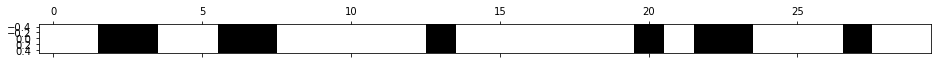

In [118]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")

In [119]:
X_test_fs = select.transform(X_test)
svm.fit(X_train_fs, y_train).score(X_test_fs, y_test)

0.9370629370629371

In [120]:
from sklearn.feature_selection import SelectKBest

print(X_train.shape)

(426, 30)


In [121]:
X_train_new = SelectKBest(k=5).fit_transform(X_train, y_train) # 5개를 선택해 fit, transform을 동시에 해야함.
X_train_new.shape

(426, 5)

### Feature Generation
##### Automatic generating polynomial and interaction features
"""입력값 x 를 다항식으로 변환한다.
x→[1,x,x2,x3,⋯]
 
만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.
[x1,x2]→[1,x1,x2,x21,x1x2,x22]
 
다음과 같은 파라미터를 가진다.
"""
###### degree : 차수
###### interaction_only: interaction 항 생성 여부
###### include_bias : 상수항 생성 여부

In [122]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(1,7).reshape(3, 2)
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [123]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  5.,  6., 25., 30., 36.]])

In [125]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  5.,  6., 30.]])

In [124]:
print(X_train.shape)

poly = PolynomialFeatures(2)
poly.fit_transform(X_train).shape

(426, 30)


(426, 496)